## Import & Conf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import warnings
warnings.filterwarnings('ignore')

# Build the api

In [2]:
headers = {
  'Referer': 'https://stats.nba.com/players/shots-dribbles',
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
  'x-nba-stats-origin': 'stats'
}



In [3]:
def get_shooting_stats(  url="http://stats.nba.com/stats/leaguedashplayerptshot?",
                PerMode="PerGame",
                LeagueID = "00",
                Season = "2019-20",
                SeasonType = "Regular Season",
                PORound= 0,
                CloseDefDistRange= '',
                ShotClockRange='',
                ShotDistRange= '',#'> 5',
                TouchTimeRange= '',
                DribbleRange= "0 Dribbles",
                GeneralRange= '',
                TeamID= 0,
                Outcome= '',
                Location= '',
                Month= 0,
                SeasonSegment= '',
                DateFrom= '',
                DateTo= '',
                OpponentTeamID= 0,
                VsConference= '',
                VsDivision= '',
                Conference= '',
                Division= '',
                GameSegment= '',
                Period= 0,
                LastNGames= 0):
    url = url
    api_param = {
    "PerMode": PerMode,
    "LeagueID": LeagueID,
    "Season": Season,
    "SeasonType": SeasonType,
    "PORound": PORound,
    "CloseDefDistRange": CloseDefDistRange,#'0-2 Feet - Very Tight',
    "ShotClockRange":ShotClockRange,
    "ShotDistRange": ShotDistRange,#'> 5',
    "TouchTimeRange": TouchTimeRange,
    "DribbleRange": DribbleRange,
    "GeneralRange": GeneralRange,
    "TeamID": TeamID,
    "Outcome": Outcome,
    "Location": Location,
    "Month": Month,
    "SeasonSegment": SeasonSegment,
    "DateFrom": DateFrom,
    "DateTo": DateTo,
    "OpponentTeamID": OpponentTeamID,
    "VsConference": VsConference,
    "VsDivision": VsDivision,
    "Conference": Conference,
    "Division": Division,
    "GameSegment": GameSegment,
    "Period": Period,
    "LastNGames": LastNGames
    }
    payload = {}
    response = requests.request("GET",url,params=api_param,headers=headers,data = payload)
    data = response.json()
    df = pd.DataFrame(data['resultSets'][0]['rowSet'],columns=data['resultSets'][0]['headers'])
    df["Season"] = Season
    df["CloseDefDistRange"] = CloseDefDistRange
    df["DribbleRange"] = DribbleRange
    return df

def seasons_string(start,end):
    '''
    creates a list of NBA seasons from start-end
    '''
    years = np.arange(start,end+1)
    seasons = []
    for year in years:
        string1 = str(year)
        string2 = str(year+1)
        season = '{}-{}'.format(string1,string2[-2:])
        seasons.append(season)
    return seasons

def get_usg_stats(  url="http://stats.nba.com/stats/leaguedashplayerstats?",
                MeasureType= "Advanced",
                PerMode= "PerGame",
                PlusMinus= "N",
                PaceAdjust= "N",
                Rank= "N",
                LeagueID= "00",
                Season= "2019-20",
                SeasonType= "Regular Season",
                PORound= 0,
                Outcome= '',
                Location= '',
                Month= 0,
                SeasonSegment= '',
                DateFrom= '',
                DateTo= '',
                OpponentTeamID= 0,
                VsConference= '',
                VsDivision= '',
                TeamID= 0,
                Conference= '',
                Division= '',
                GameSegment= '',
                Period= 0,
                ShotClockRange= '',
                LastNGames= 0,
                GameScope= '',
                PlayerExperience= '',
                PlayerPosition= '',
                StarterBench= '',
                DraftYear= '',
                DraftPick= '',
                College= '',
                Country= '',
                Height= '',
                Weight= '',
                TwoWay= 0):
    url = url
    api_param = {
    "MeasureType":MeasureType,
    "PerMode":PerMode,
    "PlusMinus":PlusMinus,
    "PaceAdjust":PaceAdjust,
    "Rank":Rank,
    "LeagueID":LeagueID,
    "Season":Season,
    "SeasonType":SeasonType,
    "PORound":PORound,
    "Outcome":Outcome,
    "Location":Location,
    "Month":Month,
    "SeasonSegment":SeasonSegment,
    "DateFrom":DateFrom,
    "DateTo":DateTo,
    "OpponentTeamID":OpponentTeamID,
    "VsConference":VsConference,
    "VsDivision":VsDivision,
    "TeamID":TeamID,
    "Conference":Conference,
    "Division":Division,
    "GameSegment":GameSegment,
    "Period":Period,
    "ShotClockRange":ShotClockRange,
    "LastNGames":LastNGames,
    "GameScope":GameScope,
    "PlayerExperience":PlayerExperience,
    "PlayerPosition":PlayerPosition,
    "StarterBench":StarterBench,
    "DraftYear":DraftYear,
    "DraftPick":DraftPick,
    "College":College,
    "Country":Country,
    "Height":Height,
    "Weight":Weight,
    "TwoWay":TwoWay
    }
    payload = {}
    response = requests.request("GET",url,params=api_param,headers=headers,data = payload)
    data = response.json()
    df = pd.DataFrame(data['resultSets'][0]['rowSet'],columns=data['resultSets'][0]['headers'])
    df["Season"] = Season
#     df["CloseDefDistRange"] = CloseDefDistRange
#     df["DribbleRange"] = DribbleRange
    return df


def get_def_diff_pct_stats(url="https://stats.nba.com/stats/leaguedashptdefend?",
                PerMode= "PerGame",
                LeagueID= "00",
                Season= "2019-20",
                SeasonType= "Regular Season",
                PORound= 0,
                PlayerID= '',
                TeamID= 0,
                Outcome= '',
                Location= '',
                Month= 0,
                SeasonSegment= '',
                DateFrom= '',
                DateTo= '',
                OpponentTeamID= 0,
                VsConference= '',
                VsDivision= '',
                Conference= '',
                Division= '',
                GameSegment= '',
                Period= 0,
                LastNGames= 0,
                DraftYear= '',
                DraftPick= '',
                College= '',
                Country= '',
                Height= '',
                Weight= '',
                PlayerExperience= '',
                PlayerPosition= '',
                StarterBench= '',
                DefenseCategory= "Overall"):
    url = url
    api_param = {
    "PerMode":PerMode,
    "LeagueID":LeagueID,
    "Season":Season,
    "SeasonType":SeasonType,
    "PORound":PORound,
    "PlayerID":PlayerID,
    "TeamID":TeamID,
    "Outcome":Outcome,
    "Location":Location,
    "Month":Month,
    "SeasonSegment":SeasonSegment,
    "DateFrom":DateFrom,
    "DateTo":DateTo,
    "OpponentTeamID":OpponentTeamID,
    "VsConference":VsConference,
    "VsDivision":VsDivision,
    "Conference":Conference,
    "Division":Division,
    "GameSegment":GameSegment,
    "Period":Period,
    "LastNGames":LastNGames,
    "DraftYear":DraftYear,
    "DraftPick":DraftPick,
    "College":College,
    "Country":Country,
    "Height":Height,
    "Weight":Weight,
    "PlayerExperience":PlayerExperience,
    "PlayerPosition":PlayerPosition,
    "StarterBench":StarterBench,
    "DefenseCategory":DefenseCategory
}

    payload = {}
    response = requests.request("GET",url,params=api_param,headers=headers,data = payload)
    data = response.json()
    df = pd.DataFrame(data['resultSets'][0]['rowSet'],columns=data['resultSets'][0]['headers'])
    df["Season"] = Season
#     df["CloseDefDistRange"] = CloseDefDistRange
#     df["DribbleRange"] = DribbleRange
    return df
    
def get_shooting_stats(  url="http://stats.nba.com/stats/leaguedashplayerptshot?",
                PerMode="PerGame",
                LeagueID = "00",
                Season = "2019-20",
                SeasonType = "Regular Season",
                PORound= 0,
                CloseDefDistRange= '',
                ShotClockRange='',
                ShotDistRange= '',#'> 5',
                TouchTimeRange= '',
                DribbleRange= "0 Dribbles",
                GeneralRange= '',
                TeamID= 0,
                Outcome= '',
                Location= '',
                Month= 0,
                SeasonSegment= '',
                DateFrom= '',
                DateTo= '',
                OpponentTeamID= 0,
                VsConference= '',
                VsDivision= '',
                Conference= '',
                Division= '',
                GameSegment= '',
                Period= 0,
                LastNGames= 0):
    url = url
    api_param = {
    "PerMode": PerMode,
    "LeagueID": LeagueID,
    "Season": Season,
    "SeasonType": SeasonType,
    "PORound": PORound,
    "CloseDefDistRange": CloseDefDistRange,#'0-2 Feet - Very Tight',
    "ShotClockRange":ShotClockRange,
    "ShotDistRange": ShotDistRange,#'> 5',
    "TouchTimeRange": TouchTimeRange,
    "DribbleRange": DribbleRange,
    "GeneralRange": GeneralRange,
    "TeamID": TeamID,
    "Outcome": Outcome,
    "Location": Location,
    "Month": Month,
    "SeasonSegment": SeasonSegment,
    "DateFrom": DateFrom,
    "DateTo": DateTo,
    "OpponentTeamID": OpponentTeamID,
    "VsConference": VsConference,
    "VsDivision": VsDivision,
    "Conference": Conference,
    "Division": Division,
    "GameSegment": GameSegment,
    "Period": Period,
    "LastNGames": LastNGames
    }
    payload = {}
    response = requests.request("GET",url,params=api_param,headers=headers,data = payload)
    data = response.json()
    df = pd.DataFrame(data['resultSets'][0]['rowSet'],columns=data['resultSets'][0]['headers'])
    df["Season"] = Season
    df["CloseDefDistRange"] = CloseDefDistRange
    df["DribbleRange"] = DribbleRange
    return df

# Conf

In [4]:
minimum_minuites = 20 * 50
start_season = 2017
end_season = 2019

## functions

In [5]:
def minuites_filter(df):
    return df[(df["SUM_MIN"] > minimum_minuites)]

## Shooting analytics

## Conf

In [55]:
min_shots_attempts = 150
dribbles = ["0 Dribbles","1 Dribble"]
CloseDefDistRanges = ['4-6 Feet - Open'] #['0-2 Feet - Very Tight','2-4 Feet - Tight','4-6 Feet - Open','']#['4-6 Feet - Open']#
relevant_3pt_columns = ["PLAYER_NAME","GP","TOTAL_ATTEMPTS","CloseDefDistRange","DribbleRange","TOTAL_MADE","Season"]

## Read From API

In [7]:
df = []
all_shots_df = []
for season in seasons_string(start_season,end_season):
    all_shots_df.append(get_shooting_stats(Season=season,CloseDefDistRange='',DribbleRange=''))
    for dribble in dribbles:
        for closeDefDistRange in CloseDefDistRanges:
            df.append(get_shooting_stats(Season=season,CloseDefDistRange=closeDefDistRange,DribbleRange=dribble))
shooting_stats_df = pd.concat([x for x in df],ignore_index=True)
all_shots_df = pd.concat([x for x in all_shots_df],ignore_index=True)


## Aggregate attempts - enganeering

In [8]:
df_3pt = shooting_stats_df
df_3pt["TOTAL_ATTEMPTS"] = round(df_3pt["GP"] * df_3pt["FG3A"])
df_3pt["TOTAL_MADE"]     = round(df_3pt["GP"] * df_3pt["FG3M"])


In [9]:
all_shots_df["TOTAL_3S"]    = round(all_shots_df["GP"] * all_shots_df["FG3A"])
all_shots_df["TOTAL_SHOTS"] = all_shots_df["GP"] * all_shots_df["FGA"]

## Group data to last season

In [10]:
df_3pt_summary = df_3pt[relevant_3pt_columns].groupby("PLAYER_NAME",as_index=False).sum()
df_3pt_summary["3PT_PCT"] = df_3pt_summary["TOTAL_MADE"] / df_3pt_summary["TOTAL_ATTEMPTS"]

In [11]:
all_shots_summary = all_shots_df.groupby("PLAYER_NAME",as_index=False).sum()
all_shots_summary["FREQ_PCT"] = all_shots_summary["TOTAL_3S"] / all_shots_summary["TOTAL_SHOTS"]
df_3pt_frequency = all_shots_summary[["FREQ_PCT","PLAYER_NAME"]]

## add 3pt frequency to our 3pt shots

In [51]:
df_3pt_freq_pct = df_3pt_summary.merge(df_3pt_frequency)


## Calculate avargaes to filter data

In [976]:
avg_3pt_freq = (all_shots_summary["TOTAL_3S"].sum() / all_shots_summary["TOTAL_SHOTS"].sum()) * 1.4
avg_shooting_pct = (df_3pt_freq_pct["TOTAL_MADE"].sum() / df_3pt_freq_pct["TOTAL_ATTEMPTS"].sum())
freq_3pt_filter = 0.5

## Filter data

In [977]:
min_attemps_filter = df_3pt_freq_pct["TOTAL_ATTEMPTS"] > min_shots_attempts
above_avg_freq_filter = df_3pt_freq_pct["FREQ_PCT"] > freq_3pt_filter
df_3pt_freq_pct_filtered = df_3pt_freq_pct[min_attemps_filter]
df_3pt_freq_pct_filtered = df_3pt_freq_pct_filtered[above_avg_freq_filter]
df_3pt_freq_pct_filtered = df_3pt_freq_pct_filtered.drop(["GP"],axis=1)


In [962]:
df_3pt_freq_pct_filtered[df_3pt_freq_pct_filtered["PLAYER_NAME"] == "Matisse Thybulle"]

,PLAYER_NAME,TOTAL_ATTEMPTS,TOTAL_MADE,3PT_PCT,FREQ_PCT


# Usage Analytics

## Conf

In [963]:
max_usg_pct = 0.25

## Read From API

In [964]:
df = []
for season in seasons_string(start_season,end_season):
    df.append(get_usg_stats(Season=season))
usg_stats_df = pd.concat([x for x in df],ignore_index=True)

## Calculate totals before group

In [965]:
usg_stats_df["TOTAL_USG"]     = usg_stats_df["USG_PCT"] * usg_stats_df["GP"] * usg_stats_df["MIN"]
usg_stats_df["TOTAL_AST_PCT"] = usg_stats_df["AST_PCT"] * usg_stats_df["GP"] * usg_stats_df["MIN"]
usg_stats_df["TOTAL_MIN"]     = usg_stats_df["GP"] * usg_stats_df["MIN"]

## Check for players that play in last season

In [966]:
relevant_season = usg_stats_df.groupby(["PLAYER_NAME"],as_index=False).max()[["PLAYER_NAME","Season"]]
relevant_season = relevant_season[relevant_season["Season"] == "2019-20"]

## Group data toghter and enganeering

In [967]:
usg_stats_summary = usg_stats_df.groupby("PLAYER_NAME",as_index=False).sum()

In [968]:
usg_stats_summary["USG_PCT"] = usg_stats_summary["TOTAL_USG"] / usg_stats_summary["TOTAL_MIN"]
usg_stats_summary["AST_PCT"] = usg_stats_summary["TOTAL_AST_PCT"] / usg_stats_summary["TOTAL_MIN"]

## Calculate avarage for filter and filer

In [969]:
ast_pct_avg = usg_stats_summary["AST_PCT"].mean()

In [970]:
usg_filter = usg_stats_summary["USG_PCT"] <= max_usg_pct
ast_filter = usg_stats_summary["AST_PCT"] <= ast_pct_avg
minuites_filter = usg_stats_summary["TOTAL_MIN"] >= minimum_minuites
usg_stats_summary_filtered = usg_stats_summary[usg_filter]
usg_stats_summary_filtered = usg_stats_summary_filtered[ast_filter]
usg_stats_summary_filtered = usg_stats_summary_filtered[minuites_filter]
usg_stats_summary_filtered = usg_stats_summary_filtered.merge(relevant_season,on="PLAYER_NAME")

## Merge usage and 3pt shots

In [982]:
usage_3pt_merge = df_3pt_freq_pct_filtered.merge(usg_stats_summary_filtered,on="PLAYER_NAME")
usage_3pt_merge[["PLAYER_NAME","3PT_PCT","TOTAL_ATTEMPTS","FREQ_PCT","USG_PCT","AST_PCT"]].head(10)

,PLAYER_NAME,3PT_PCT,TOTAL_ATTEMPTS,FREQ_PCT,USG_PCT,AST_PCT
0,Al-Farouq Aminu,0.333333,192.0,0.527536,0.138241,0.059046
1,Allen Crabbe,0.380665,331.0,0.669855,0.166190,0.073975
2,Anthony Tolliver,0.378641,309.0,0.796730,0.130050,0.067566
3,Ben McLemore,0.365000,200.0,0.661380,0.167203,0.061037
4,Brook Lopez,0.315018,273.0,0.527703,0.187105,0.078685
5,Bryn Forbes,0.410579,397.0,0.550315,0.171722,0.094771
6,CJ Miles,0.333333,255.0,0.725029,0.195988,0.063050
7,Danny Green,0.403030,330.0,0.658343,0.145106,0.077347
8,Danuel House Jr.,0.298137,161.0,0.642920,0.137736,0.064057
9,Davis Bertans,0.407494,427.0,0.747740,0.160982,0.085540


## Mesure Defense - DRPM

## Read From API

In [972]:
rapm_df = pd.read_csv("rapm.csv").drop_duplicates()

## Calculate avg for graph

In [973]:
avg_rapm = rapm_df["RAPM__Def"].mean()

## Graph conf

In [974]:
from matplotlib.patches import Rectangle
min_drpm = -3.5#rpm_3pt_usg_df["DRPM"].min()
max_drpm = 3.5#rpm_3pt_usg_df["DRPM"].max()
min_shot_pct = 0#rpm_3pt_usg_df["3PT_PCT"].min()
max_shot_pct = 0.55
alpha= 0.2
plt.rc('font', size=14)


## Draw Graph 

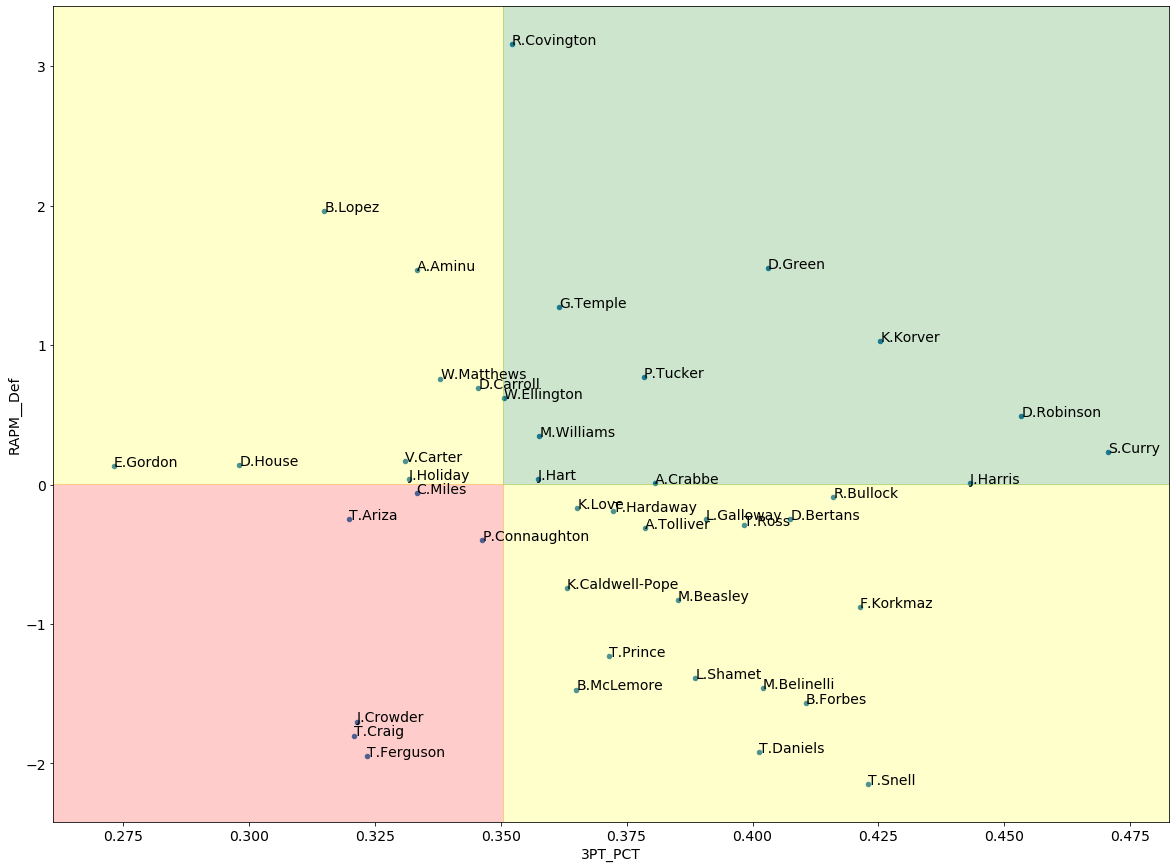

In [983]:
# split here to two graph because overlap of text
rapm_3pt_usg_df = usage_3pt_merge.merge(rapm_df,on="PLAYER_NAME")
rapm_3pt_usg_df = rapm_3pt_usg_df.sort_values("RAPM__Def")
#rapm_3pt_usg_df = rapm_3pt_usg_df[~rapm_3pt_usg_df["PLAYER_NAME"].isin(["Pat Connaughton","Trey Lyles","Danilo Gallinari","Tim Hardaway Jr.","Markieff Morris","Bojan Bogdanovic","OG Anunoby","Jaylen Brown","Langston Galloway","Mikal Bridges","DeMarre Carroll","Kyle Kuzma"])]
                                                                    
ax = rapm_3pt_usg_df.plot.scatter(x="3PT_PCT",y="RAPM__Def",figsize=(20,15))
ax.add_patch(Rectangle((min_shot_pct,min_drpm), avg_shooting_pct - min_shot_pct , abs(avg_rapm - min_drpm),color='red',alpha=alpha))
ax.add_patch(Rectangle((min_shot_pct,avg_rapm), avg_shooting_pct - min_shot_pct , abs(max_drpm - avg_rapm),color='yellow',alpha=alpha))
ax.add_patch(Rectangle((avg_shooting_pct,min_drpm), max_shot_pct - avg_shooting_pct , abs(avg_rapm - min_drpm),color='yellow',alpha=alpha))
ax.add_patch(Rectangle((avg_shooting_pct,avg_rapm), max_shot_pct - avg_shooting_pct , abs(max_drpm - avg_rapm),color='green',alpha=alpha))
#ax.set_ylim(-3,3.2)
for i, txt in enumerate(rapm_3pt_usg_df.PLAYER_NAME):
    last_name_cnt = rapm_3pt_usg_df[rapm_3pt_usg_df["PLAYER_NAME"].str.contains(" " + txt.split(" ")[1])].count()["primaryKey"]
        
    if(last_name_cnt > 1): # take first name and last name
        name = txt.split(" ")[0][0] + "." + txt.split(" ")[1]
    else: # take last name
        name = txt.split(" ")[0][0] + "." + txt.split(" ")[1]#txt.split(" ")[1]

    ax.annotate( name, (rapm_3pt_usg_df["3PT_PCT"].iat[i],rapm_3pt_usg_df["RAPM__Def"].iat[i]),\
                xytext=(rapm_3pt_usg_df["3PT_PCT"].iat[i],rapm_3pt_usg_df["RAPM__Def"].iat[i]), textcoords='data',rotation=0)

plt.show()

In [984]:
# # rapm_3pt_usg_df = usage_3pt_merge.merge(rapm_df,on="PLAYER_NAME")
# # rapm_3pt_usg_df = rapm_3pt_usg_df.sort_values("RAPM__Def")
# # rapm_3pt_usg_df = rapm_3pt_usg_df[rapm_3pt_usg_df["PLAYER_NAME"].isin(["Pat Connaughton","Trey Lyles","Danilo Gallinari","Tim Hardaway Jr.","Markieff Morris","Bojan Bogdanovic","OG Anunoby","Jaylen Brown","Langston Galloway","Mikal Bridges","DeMarre Carroll","Kyle Kuzma"])]
# #                                                                     # 20 , 15
# # ax = rapm_3pt_usg_df.plot.scatter(x="3PT_PCT",y="RAPM__Def",figsize=(20,11))
# # ax.add_patch(Rectangle((min_shot_pct,min_drpm), avg_shooting_pct - min_shot_pct , abs(avg_rapm - min_drpm),color='red',alpha=alpha))
# # ax.add_patch(Rectangle((min_shot_pct,avg_rapm), avg_shooting_pct - min_shot_pct , abs(max_drpm - avg_rapm),color='yellow',alpha=alpha))
# # ax.add_patch(Rectangle((avg_shooting_pct,min_drpm), max_shot_pct - avg_shooting_pct , abs(avg_rapm - min_drpm),color='yellow',alpha=alpha))
# # ax.add_patch(Rectangle((avg_shooting_pct,avg_rapm), max_shot_pct - avg_shooting_pct , abs(max_drpm - avg_rapm),color='green',alpha=alpha))
# # ax.set_ylim(-3,3)
# # ax.set_xlim(0.23,0.49)
# # plt.rc('font', size=16)

# # for i, txt in enumerate(rapm_3pt_usg_df.PLAYER_NAME):
# #     last_name_cnt = rapm_3pt_usg_df[rapm_3pt_usg_df["PLAYER_NAME"].str.contains(" " + txt.split(" ")[1])].count()["primaryKey"]
        
# #     if(last_name_cnt > 1): # take first name and last name
# #         name = txt.split(" ")[0][0] + "." + txt.split(" ")[1]
# #     else: # take last name
# #         name = txt.split(" ")[1]

# #     ax.annotate( name, (rapm_3pt_usg_df["3PT_PCT"].iat[i],rapm_3pt_usg_df["RAPM__Def"].iat[i]),\
# #                 xytext=(rapm_3pt_usg_df["3PT_PCT"].iat[i],rapm_3pt_usg_df["RAPM__Def"].iat[i]), textcoords='data',rotation=0)

# # plt.show()
# rapm_3pt_usg_df[rapm_3pt_usg_df["PLAYER_NAME"] == "Robert Covington"]

## Calculate Rank for results

In [985]:
from sklearn.preprocessing import MinMaxScaler
import math
rapm_3pt_usg_df_ranking = rapm_3pt_usg_df#[rapm_3pt_usg_df["PLAYER_NAME"] != "Robert Covington"]
scaler=MinMaxScaler(feature_range=(rapm_3pt_usg_df["3PT_PCT"].min(),rapm_3pt_usg_df["3PT_PCT"].max()))
rapm_3pt_usg_df_ranking["DRAPM_NORMALIZE"]=scaler.fit_transform(rapm_3pt_usg_df_ranking[["RAPM__Def"]])
rapm_3pt_usg_df_ranking["DRAPM_3PT_AVG"] = (rapm_3pt_usg_df_ranking["DRAPM_NORMALIZE"] * rapm_3pt_usg_df_ranking["3PT_PCT"]) ** 0.5

In [998]:
rapm_3pt_usg_df_ranking["DRAPM_RANK"] = rapm_3pt_usg_df_ranking["RAPM__Def"].rank(method='first',ascending=False)
rapm_3pt_usg_df_ranking["3PT_RANK"] = rapm_3pt_usg_df_ranking["3PT_PCT"].rank(method='first',ascending=False)
rapm_3pt_usg_df_ranking["TOTAL_RANK"] = (rapm_3pt_usg_df_ranking["DRAPM_RANK"] + rapm_3pt_usg_df_ranking["3PT_RANK"])/2
rapm_3pt_usg_df_ranking = rapm_3pt_usg_df_ranking[["PLAYER_NAME","TOTAL_ATTEMPTS","TOTAL_MADE","3PT_PCT","RAPM__Def","FREQ_PCT","DRAPM_RANK","3PT_RANK","TOTAL_RANK"]]

## Find best players

In [999]:
rapm_3pt_usg_df_ranking_best = rapm_3pt_usg_df_ranking[rapm_3pt_usg_df_ranking["RAPM__Def"] > avg_rapm]
rapm_3pt_usg_df_ranking_best = rapm_3pt_usg_df_ranking_best[rapm_3pt_usg_df_ranking["3PT_PCT"] > avg_shooting_pct]

In [1003]:
rapm_3pt_usg_df_ranking_best.sort_values("TOTAL_RANK",ascending=True).head(60)

,PLAYER_NAME,TOTAL_ATTEMPTS,TOTAL_MADE,3PT_PCT,RAPM__Def,FREQ_PCT,DRAPM_RANK,3PT_RANK,TOTAL_RANK
21,Kyle Korver,308.0,131.0,0.425325,1.03,0.759668,6.0,4.0,5.0
11,Duncan Robinson,225.0,102.0,0.453333,0.49,0.873797,11.0,2.0,6.5
7,Danny Green,330.0,133.0,0.403030,1.55,0.658343,3.0,10.0,6.5
31,Seth Curry,153.0,72.0,0.470588,0.23,0.549632,13.0,1.0,7.0
16,Joe Harris,431.0,191.0,0.443155,0.01,0.546107,19.0,3.0,11.0
27,P.J. Tucker,185.0,70.0,0.378378,0.77,0.721019,7.0,19.0,13.0
30,Robert Covington,548.0,193.0,0.352190,3.16,0.660412,1.0,28.0,14.5
14,Garrett Temple,271.0,98.0,0.361624,1.27,0.563859,5.0,25.0,15.0
1,Allen Crabbe,331.0,126.0,0.380665,0.01,0.669855,20.0,17.0,18.5
26,Marvin Williams,274.0,98.0,0.357664,0.35,0.576764,12.0,26.0,19.0


## Find worst players

In [1004]:
rapm_3pt_usg_df_ranking_worst = rapm_3pt_usg_df_ranking[rapm_3pt_usg_df_ranking["RAPM__Def"] < avg_rapm]
rapm_3pt_usg_df_ranking_worst = rapm_3pt_usg_df_ranking_worst[rapm_3pt_usg_df_ranking["3PT_PCT"] < avg_shooting_pct]

In [1005]:
rapm_3pt_usg_df_ranking_worst.sort_values("TOTAL_RANK",ascending=False).head(20)

,PLAYER_NAME,TOTAL_ATTEMPTS,TOTAL_MADE,3PT_PCT,RAPM__Def,FREQ_PCT,DRAPM_RANK,3PT_RANK,TOTAL_RANK
33,Terrance Ferguson,201.0,65.0,0.323383,-1.95,0.710448,42.0,37.0,39.5
37,Torrey Craig,187.0,60.0,0.320856,-1.80,0.512192,40.0,39.0,39.5
15,Jae Crowder,451.0,145.0,0.321508,-1.70,0.620590,39.0,38.0,38.5
38,Trevor Ariza,394.0,126.0,0.319797,-0.25,0.653587,26.0,40.0,33.0
28,Pat Connaughton,231.0,80.0,0.346320,-0.40,0.557586,30.0,30.0,30.0
6,CJ Miles,255.0,85.0,0.333333,-0.06,0.725029,21.0,33.0,27.0


## Find one job players

In [991]:
rapm_3pt_usg_df_ranking_yellow = rapm_3pt_usg_df_ranking[\
~((rapm_3pt_usg_df_ranking["RAPM__Def"] < avg_rapm) & (rapm_3pt_usg_df_ranking["3PT_PCT"] < avg_shooting_pct)) \
& ~((rapm_3pt_usg_df_ranking["RAPM__Def"] > avg_rapm) & (rapm_3pt_usg_df_ranking["3PT_PCT"] >avg_shooting_pct))]

In [996]:
rapm_3pt_usg_df_ranking_yellow.sort_values("TOTAL_RANK",ascending=True).head(5)

,PLAYER_NAME,TOTAL_ATTEMPTS,TOTAL_MADE,3PT_PCT,RAPM__Def,FREQ_PCT,TOTAL_RANK,DRAPM_RANK,3PT_RANK
29,Reggie Bullock,262.0,109.0,0.416031,-0.09,0.587109,14.5,22.0,7.0
9,Davis Bertans,427.0,174.0,0.407494,-0.25,0.747740,18.0,27.0,9.0
0,Al-Farouq Aminu,192.0,64.0,0.333333,1.54,0.527536,19.0,4.0,34.0
23,Langston Galloway,389.0,152.0,0.390746,-0.25,0.635901,19.5,25.0,14.0
13,Furkan Korkmaz,178.0,75.0,0.421348,-0.88,0.608344,19.5,33.0,6.0


In [779]:
# from IPython.display import HTML
# import base64

# def image_formatter(im):
#     return f'<img src="data:image/jpeg;base64,{image_base64(im)}" width=50 height=50>'

# def image_base64(im):
#     if isinstance(im, str):
#         im = get_thumbnail(im)
#     with BytesIO() as buffer:
#         im = im.convert("RGB")
#         im.save(buffer, 'jpeg')
#         return base64.b64encode(buffer.getvalue()).decode()
    
# def get_thumbnail(path):
#     i = Image.open(path)
#     i.thumbnail((150, 150), Image.LANCZOS)
#     return i
    
# from PIL import Image
# import requests
# from io import BytesIO
# rpm_3pt_usg_df_ranking_best["pic"] = ""
# for index,row in rpm_3pt_usg_df_ranking_best.iterrows():
#     player_name = rpm_3pt_usg_df_ranking_best["PLAYER_NAME"][index].split(" ")
#     payload = {}
#     response = requests.request("GET","https://nba-players.herokuapp.com/players/{0}/{1}".format(player_name[1],player_name[0]),params={},headers=headers,data = payload)
#     try:
#         img = Image.open(BytesIO(response.content))
    
#     except:
#         response = requests.request("GET","https://nba-players.herokuapp.com/players/curry/stephen",params={},headers=headers,data = payload)
#         img = None#Image.open(BytesIO(response.content))
    
#     rpm_3pt_usg_df_ranking_best["pic"][index] = img
#     #break

# # rpm_3pt_usg_df_ranking_worst["pic"] = img
# #HTML(rpm_3pt_usg_df_ranking_best.to_html(formatters={'pic': image_formatter}, escape=False))


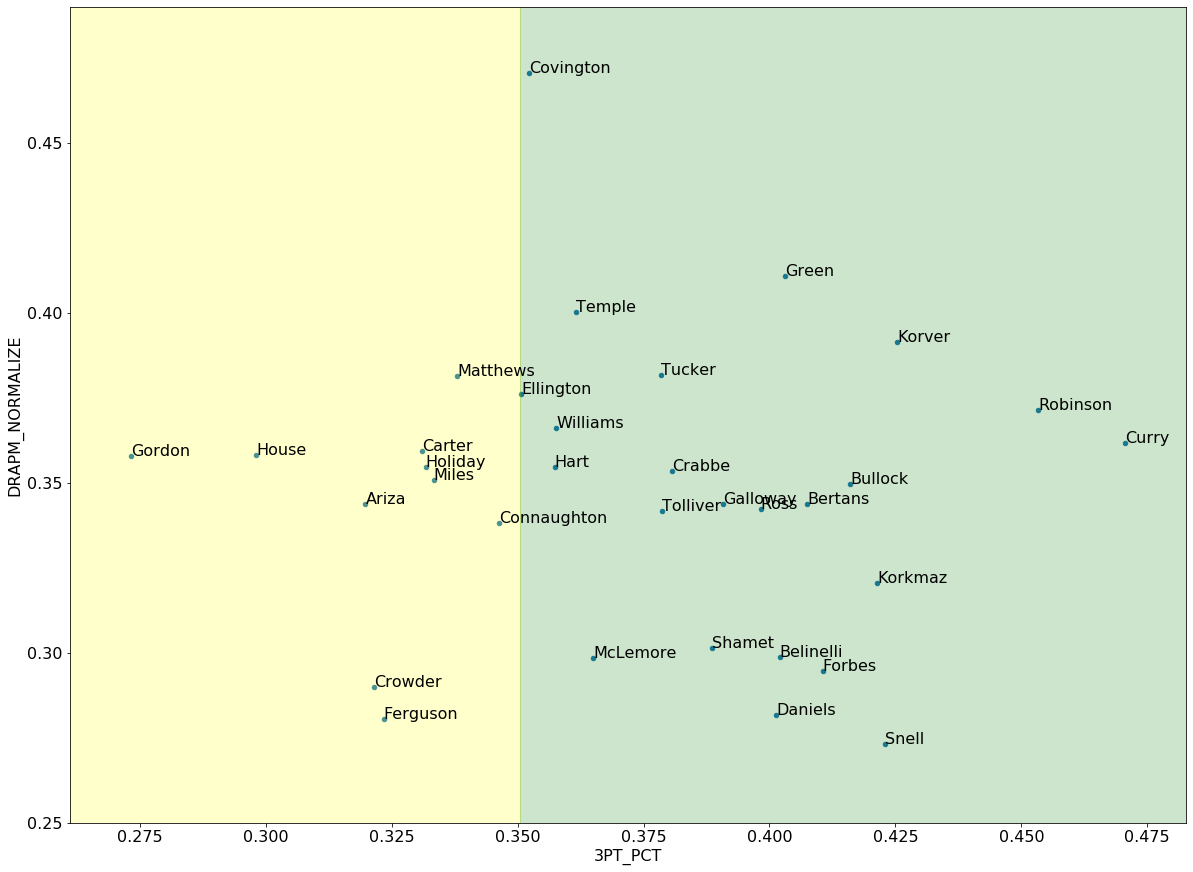

In [880]:
# split here to two graph because overlap of text
#rapm_3pt_usg_df = usage_3pt_merge.merge(rapm_df,on="PLAYER_NAME")
#rapm_3pt_usg_df = rapm_3pt_usg_df.sort_values("RAPM__Def")
#rapm_3pt_usg_df = rapm_3pt_usg_df[~rapm_3pt_usg_df["PLAYER_NAME"].isin(["Pat Connaughton","Trey Lyles","Danilo Gallinari","Tim Hardaway Jr.","Markieff Morris","Bojan Bogdanovic","OG Anunoby","Jaylen Brown","Langston Galloway","Mikal Bridges","DeMarre Carroll","Kyle Kuzma"])]
                                                                    
ax = rapm_3pt_usg_df_ranking.plot.scatter(x="3PT_PCT",y="DRAPM_NORMALIZE",figsize=(20,15))
ax.add_patch(Rectangle((min_shot_pct,min_drpm), avg_shooting_pct - min_shot_pct , abs(avg_rapm - min_drpm),color='red',alpha=alpha))
ax.add_patch(Rectangle((min_shot_pct,avg_rapm), avg_shooting_pct - min_shot_pct , abs(max_drpm - avg_rapm),color='yellow',alpha=alpha))
ax.add_patch(Rectangle((avg_shooting_pct,min_drpm), max_shot_pct - avg_shooting_pct , abs(avg_rapm - min_drpm),color='yellow',alpha=alpha))
ax.add_patch(Rectangle((avg_shooting_pct,avg_rapm), max_shot_pct - avg_shooting_pct , abs(max_drpm - avg_rapm),color='green',alpha=alpha))
ax.set_ylim(0.25,0.49)
for i, txt in enumerate(rapm_3pt_usg_df.PLAYER_NAME):
    last_name_cnt = rapm_3pt_usg_df_ranking[rapm_3pt_usg_df_ranking["PLAYER_NAME"].str.contains(" " + txt.split(" ")[1])].count()["TOTAL_RANK"]
        
    if(last_name_cnt > 1): # take first name and last name
        name = txt.split(" ")[0][0] + "." + txt.split(" ")[1]
    else: # take last name
        name = txt.split(" ")[1]

    ax.annotate( name, (rapm_3pt_usg_df_ranking["3PT_PCT"].iat[i],rapm_3pt_usg_df_ranking["DRAPM_NORMALIZE"].iat[i]),\
                xytext=(rapm_3pt_usg_df_ranking["3PT_PCT"].iat[i],rapm_3pt_usg_df_ranking["DRAPM_NORMALIZE"].iat[i]), textcoords='data',rotation=0)

plt.show()